# Oversampling to correct for inbalanced data using naive samling or SMOTE

Uses imblearn See: https://imbalanced-learn.org

Install with: `pip install -U imbalanced-learn`, or `conda install -c conda-forge imbalanced-learn`

*Reference*

N. V. Chawla, K. W. Bowyer, L. O.Hall, W. P. Kegelmeyer, “SMOTE: synthetic minority over-sampling technique,” Journal of artificial intelligence research, 16, 321-357, 2002.

# Create dummy data

In [1]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)

Count instances of each class

In [2]:
from collections import Counter
print(sorted(Counter(y).items()))

[(0, 64), (1, 262), (2, 4674)]


### Plot function

In [3]:
import matplotlib.pyplot as plt

def plot_classes(X,y):
    colours = ['k','b','g']
    point_colours = [colours[val] for val in y]
    X1 = X[:,0]
    X2 = X[:,1]
    plt.scatter(X1,X2,
                facecolor = point_colours,
                edgecolor = 'k')
    plt.show()

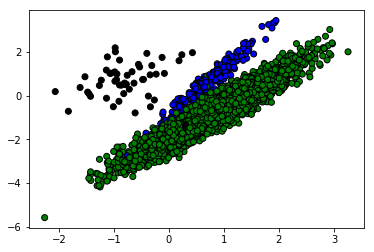

In [4]:
plot_classes(X,y)

## Oversample to match numbers in each class

In [5]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

Count instances of each class in the augmented data

In [6]:
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 4674), (1, 4674), (2, 4674)]


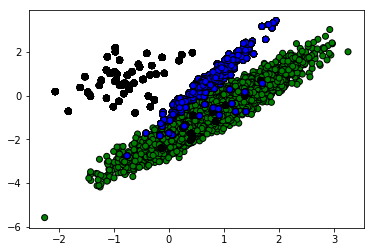

In [7]:
# Plot data

plot_classes(X_resampled,y_resampled)

# SMOTE with continuous variables

In [8]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

# Count instances of each class
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 4674), (1, 4674), (2, 4674)]


In [9]:
# Plot points
plot_classes(X_resampled,y_resampled)

# SMOTE with mixed continuous and categorical values

In [10]:
# create a synthetic data set with continuous and categorical features
import numpy as np
rng = np.random.RandomState(42)
n_samples = 50
X = np.empty((n_samples, 3), dtype=object)
X[:, 0] = rng.choice(['A', 'B', 'C'], size=n_samples).astype(object)
X[:, 1] = rng.randn(n_samples)
X[:, 2] = rng.randint(3, size=n_samples)
y = np.array([0] * 20 + [1] * 30)

In [11]:
# Count instances of each class
print(sorted(Counter(y).items()))

[(0, 20), (1, 30)]


In [12]:
# Show last 10 values of X
print (X[-10:])

[['A' 1.4689412854323924 2]
 ['C' -1.1238983345400366 0]
 ['C' 0.9500053955071801 2]
 ['A' 1.7265164685753638 1]
 ['A' 0.4578850770000152 0]
 ['C' -1.6842873783658814 0]
 ['B' 0.32684522397001387 0]
 ['A' -0.0811189541586873 2]
 ['B' 0.46779475326315173 1]
 ['B' 0.7361223506692577 0]]


In [13]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 2], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

In [14]:
# Count instances of each class
print(sorted(Counter(y_resampled).items()))

[(0, 30), (1, 30)]


In [15]:
# Show last 10 values of X
print (X_resampled[-10:])

[['C' -1.0600505672469849 1]
 ['C' -0.36965644259183145 1]
 ['A' 0.1453826708354494 2]
 ['C' -1.7442827953859052 2]
 ['C' -1.6278053447258838 2]
 ['A' 0.5246469549655818 2]
 ['B' -0.3657680728116921 2]
 ['A' 0.9344237230779993 2]
 ['B' 0.3710891618824609 2]
 ['B' 0.3327240726719727 2]]
